 # Machine Learning LAB 1 (course 2020/21, P. Zanuttigh, M. Toldo) 

The notebook contains some simple tasks to be performed about classification and regression. Complete all the required code sections and answer to all the questions.

## 1) Classification of NBA players role

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!

### Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb

Student name: Lucia Depaoli<br>
ID Number: 2016960

### Dataset description

We will be working with a dataset of NBA basketball players data (you can get from https://www.kaggle.com/jacobbaruch/nba-player-of-the-week the full dataset).

The provided data is a subset of the Kaggle dataset containing the players that have the role of Center and of Point Guard. For each player the dataset contains 3 features, the height, the weight and the age.

From Wikipedia (if you are not a basketball fan!!):

The Center (C), also known as the five, or the big man, is one of the five positions in a regular basketball game. The center is normally the tallest player on the team, and often has a great deal of strength and body mass as well. In the NBA, the center is usually 6' 10" (2.08 m) or taller and usually weighs 240 lbs (109 kg) or more. 

Point Guards (PG, a.k.a. as "play maker") are expected to run the team's offense by controlling the ball and making sure that it gets to the right players at the right time. In the NBA, point guards are usually about 6' 3" (1.93 m) or shorter, and average about 6' 2" (1.88 m). Having above-average size (height, muscle) is considered advantageous, although size is secondary to situational awareness, speed, quickness, and ball handling skills. Shorter players tend to be better dribblers since they are closer to the floor, and thus have better control of the ball while dribbling. 


As it is clear from the description, the height and weight of the player are good hints to predict their role and in this lab we will exploit this features to estimate the role.


### Three features are considered for this dataset:


1) Height in cm

2) Weight in kg

3) Age in years

We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed (you can use your ID (matricola) or any other number!).

In [2]:
IDnumber = 2021119 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 70% tranining 30% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
#load the dataset
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA) #skip first line
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)  #convert input (list in this case) to an array

print(dataset)

X = dataset[:,1:4] #columns 1,2,3 contain the features
Y = dataset[:,0]  # column 0: labels

Y = Y*2-1  # set labels to -1, 1 as required by perceptron implementation

m = dataset.shape[0] #numbers of x
print(m)
permutation = np.random.permutation(m) # random permurtation

X = X[permutation]
Y = Y[permutation]

print(X)
print(Y)

['Position', 'Height cm', 'kg', 'Age']
[[  0 198  85  29]
 [  0 192  76  37]
 [  0 210 114  24]
 ...
 [  1 213 108  29]
 [  1 216 112  29]
 [  1 216 146  25]]
260
[[188  83  32]
 [213 108  29]
 [185  81  23]
 [192  76  27]
 [216 112  25]
 [231 139  26]
 [186 119  23]
 [216 146  23]
 [219 117  31]
 [195  94  30]
 [216 146  23]
 [213 128  28]
 [216 146  22]
 [186 119  23]
 [219 117  23]
 [185 108  23]
 [213 117  24]
 [216 146  23]
 [185  81  22]
 [185  81  26]
 [185 126  30]
 [213 117  23]
 [195  94  28]
 [195  94  27]
 [213 108  24]
 [216 112  32]
 [186 121  30]
 [185  81  25]
 [186 119  23]
 [216 112  28]
 [213 108  25]
 [185  76  26]
 [216 146  27]
 [195  94  29]
 [216 146  20]
 [185  88  26]
 [210  94  29]
 [216 146  24]
 [210 114  33]
 [186 119  21]
 [192  85  23]
 [185  88  32]
 [185 108  23]
 [182  67  27]
 [185 126  28]
 [186 103  32]
 [213 108  30]
 [186 119  26]
 [186 125  22]
 [192  90  26]
 [182  78  25]
 [182  78  28]
 [210 114  29]
 [185  81  27]
 [216 146  27]
 [216 112  2

We are going to classify class "1" (Center) vs class "-1" (Point Guard)

B) **TO DO** Divide the data into training set and test set (70% of the data in the first set, 30% in the second one)

In [4]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

#m_training needs to be the number of samples in the training set
m_training = m*70//100       #70%          

#m_test needs to be the number of samples in the test set
m_test = m-m_training          #30%

#X_training = instances for training set
X_training = X[0:m_training,:]
#Y_training = labels for the training set
Y_training = Y[0:m_training]

#X_test = instances for test set
X_test = X[m_training:m,:]
#Y_test = labels for the test set
Y_test = Y[m_training:m]

print(Y_training) #to make sure that Y_training contains both 1 and -1

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[-1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1 -1
  1  1  1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1  1
  1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  1  1  1  1 -1  1  1 -1  1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1 -1
 -1 -1  1 -1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1  1
 -1 -1 -1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1
  1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1
  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1]
Shape of training set: (182, 3)
Shape of test set: (78, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [5]:
#add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print(X_test)

#execute it just one time or you will add a column at each execution

[[  1. 186. 108.  22.]
 [  1. 185. 108.  34.]
 [  1. 219. 117.  22.]
 [  1. 182.  78.  25.]
 [  1. 185.  96.  30.]
 [  1. 213. 114.  29.]
 [  1. 231. 139.  25.]
 [  1. 185. 108.  24.]
 [  1. 192.  90.  27.]
 [  1. 216. 112.  37.]
 [  1. 216. 112.  21.]
 [  1. 192.  90.  20.]
 [  1. 216. 146.  21.]
 [  1. 155.  87.  22.]
 [  1. 216. 112.  31.]
 [  1. 185. 126.  33.]
 [  1. 210. 114.  29.]
 [  1. 185.  76.  24.]
 [  1. 216. 146.  31.]
 [  1. 188.  83.  29.]
 [  1. 188.  87.  24.]
 [  1. 179.  83.  28.]
 [  1. 195.  94.  32.]
 [  1. 185.  76.  28.]
 [  1. 195.  94.  24.]
 [  1. 185.  81.  26.]
 [  1. 216. 112.  30.]
 [  1. 201.  85.  22.]
 [  1. 182.  78.  28.]
 [  1. 182.  78.  26.]
 [  1. 213. 108.  30.]
 [  1. 213. 114.  24.]
 [  1. 210. 114.  24.]
 [  1. 192.  90.  33.]
 [  1. 195.  94.  29.]
 [  1. 182.  78.  24.]
 [  1. 216. 146.  25.]
 [  1. 182.  78.  30.]
 [  1. 195.  94.  32.]
 [  1. 155.  87.  27.]
 [  1. 185.  81.  35.]
 [  1. 192.  76.  26.]
 [  1. 210. 114.  25.]
 [  1. 182.

**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [6]:
def perceptron(X, Y, max_num_iterations):
    
    w = np.zeros(X.shape[1])         #all 0
    best_w = np.zeros(X.shape[1])    #all 0
    num_samples = len(X)             #182 at the beginning
    best_error = len(X)                   #useful at the end
    c=0                              #counter
    error=0              #useful for compare error with previous error
    while c<max_num_iterations:
        
        error_ar=[]
        for i in range(num_samples):             #add to an array all the index i of the wrong samples
            if Y[i]*np.dot(X[i],w) <= 0:
                error_ar.append(i)
        
        j=np.random.choice(error_ar)             #pick a wrong index from the previous array
        w += Y[j]*X[j]                           #update w using one wrong index
        
        error_ar=[]
        
        for i in range(num_samples):             #counting of error of the new w
            if Y[i]*np.dot(X[i],w) <= 0: 
                error_ar.append(i)
            
        error=len(error_ar)
         
        if error == 0:                           #perceptron at the end! data linearly separable
            best_w = w
            best_error = error/num_samples
            break
        
        if error < best_error:                    #keeping track of the best w
            best_w[:] = w[:]
            best_error = error
        
        c+=1

    best_error/=num_samples
    
    return best_w,best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [10]:
#now run the perceptron for 100 iterations

w_found, error = perceptron(X_training,Y_training, 100)
print('Best w: ',w_found)
print("Training Error of perpceptron (100 iterations): " + str(error))

Best w:  [  -6. -395.  857. -203.]
Training Error of perpceptron (100 iterations): 0.06593406593406594


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [11]:
#now use the w_found to make predictions on test dataset

# PLACE YOUR CODE to compute the number of errors

def error(X,Y,w):
    
    num_samples = len(X)
    num_errors=0
    
    for i in range(num_samples):
        if Y[i]*np.dot(X[i],w) <= 0:
            num_errors+=1
            
    return num_errors

num_errors=error(X_test,Y_test,w_found)

true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perpceptron (100 iterations): 0.11538461538461539


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**
Training error is of the order of 6%. Test error is bigger than training error. We have used just 100 iteration for valuate the best_w and the best_error but remind we have a set of 182 samples, maybe if we use more iteration the error can be more accurate. Let's see it.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 3000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [12]:
#now run the perceptron for 3000 iterations here!

w_found, error = perceptron(X_training,Y_training, 3000)

print("Training Error of perpceptron (3000 iterations): " + str(error))

def error(X,Y,w):
    
    num_samples = len(X)
    num_errors=0
    
    for i in range(num_samples):
        if Y[i]*np.dot(X[i],w) <= 0:
            num_errors+=1
            
    return num_errors

num_errors=error(X_test,Y_test,w_found)
true_loss_estimate = num_errors/m_test

print("Test Error of perpceptron (3000 iterations): " + str(true_loss_estimate))

Training Error of perpceptron (3000 iterations): 0.06043956043956044
Test Error of perpceptron (3000 iterations): 0.11538461538461539


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**
The training error is not very different as the one achieved with 100 iteration. The test error is the same as the previous one. Test error gives us a more reliable estimation on the True error.
The results are not so much different between 100 and 3000 iterations because there are some misclassified examples that forbit the algorithm to learn the perfect w with 0 errors. If the misclassified examples are in a small number respect to the training set size, 100 iterations are enough to learn the best_w.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [13]:
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA)
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:]
Y = dataset[:,0]

Y = Y*2-1  # set labels to -1, 1 as required by perceptron implementation

m = dataset.shape[0]
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

['Position', 'Height cm', 'kg', 'Age']


**TO DO** As for the previous part, divide the data into training and test (70%-30%) and add a 1 as first component to each sample.

In [14]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

m_training = m*70//100
m_test = m-m_training

X_training = X[0:m_training,:]
Y_training = Y[0:m_training]

X_test = X_test=X[m_training:m,:]
Y_test = Y_test=Y[m_training:m]

print(Y_training)

[ 1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1  1
  1  1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1
 -1  1  1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1
 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1
 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1
 -1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1]


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [15]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

#learn from training set

logreg.fit(X_training,Y_training)

#predict on training set

Y_training_predict=logreg.predict(X_training)

#print the error rate = fraction of misclassified samples
error_rate_training = 0

for i in range(m_training):
    if (Y_training_predict[i] != Y_training[i] ):
        error_rate_training+=1
        
error_rate_training/=m_training

print("Error rate on training set: "+str(error_rate_training))

#predict on test set

Y_test_predict=logreg.predict(X_test)

#print the error rate = fraction of misclassified samples
error_rate_test = 0

for i in range(m_test):
    if (Y_test_predict[i] != Y_test[i]):
        error_rate_test+=1
        
error_rate_test/=m_test

print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.04395604395604396
Error rate on test set: 0.10256410256410256


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [16]:
#to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['height', 'weight', 'age']
labels_list = ['Center', 'Point guard']

# select a pair of features
index_feature1 = 0 # we choose height
index_feature2 = 1 # and weight (age of course is not very meaningful)
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

X_training = X_training[:,features]
Y_training = Y_training

X_test = X_test[:,features]
Y_test = Y_test

Now learn a model using the training data and measure the performances.

In [17]:
#part on logistic regression for 2 classes
logreg_2 = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

#learn from training set

logreg_2.fit(X_training,Y_training)

#predict on training set

Y_training_predict=logreg_2.predict(X_training)

#print the error rate = fraction of misclassified samples
error_rate_training = 0

for i in range(m_training):
    if (Y_training_predict[i] != Y_training[i] ):
        error_rate_training+=1
        
error_rate_training/=m_training

print("Error rate on training set: "+str(error_rate_training))

#predict on test set

Y_test_predict=logreg_2.predict(X_test)

#print the error rate = fraction of misclassified samples
error_rate_test = 0

for i in range(m_test):
    if (Y_test_predict[i] != Y_test[i]):
        error_rate_test+=1
        
error_rate_test/=m_test

print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.04395604395604396
Error rate on test set: 0.10256410256410256


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**
I select weight and height because age is not relevant for the choice of the position. We observe that the error rate are the same in both case, so we can assert that the feature "age" is uncorrelated with the choice of the label. This is because age is equally distributed in both labels -1 and 1.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

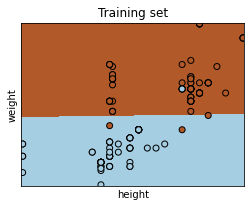

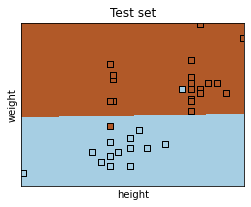

In [18]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg_2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

Dataset description: <br>
The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [19]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [20]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!
print(Data)

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

# Split data in training, validation and test sets



Given $m$ total data, denote with $m_{tv}$ the part used for training and validation. Keep $m_t$ data as training data, $m_{val}:=m_{tv}-m_t$ as validation data and $m_{test}:=m - m_{val} - m_t = m-m_{tv}$. For instance one can take $m_t=0.6m$ of the data as training, $m_{val}=0.2m$  validation and $m_{test}=0.2m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{val}$ the validation data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

VALIDATION DATA: When different model classes are present (e.g. of different complexity such as linear regression which uses a different number $d_j$ of regressors $x_1$,...$x_{d_j}$), one has to choose which one is the "best" complexity. In this simple example the validation set is not needed, but it is better to get used with it.
Let ${\cal H}_{d_j}$ be the space of models as a function of the complexity $d_j$ and let 
$$
\hat h_{d_j} = {\rm arg\; min}_{h \in {\cal H}_{d_j}} \, L_S(h)
$$

One can estimate the generalization error for model $\hat h_{d_j}$ as follows:
$$
L_{{\cal D}}(\hat h_{d_j}) \simeq \frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$
and then choose the complexity which achieves the best estimate of the generalization error
$$
\hat d_j: = {\rm arg\; min}_{d_j} \,\frac{1}{m_{val}} \sum_{ z_i \in S_{val}} \ell(\hat h_{d_j},z_i)
$$

TESTING DATA: Last, the test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training, validation and test sets (60%-20%-20%)

In [21]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

#size of each chunk of data (1/4 each): 2 of them for training, 1 for validation, 1 for testing
size_chunk = num_total_samples//5

print ("Size of each chunk of data: ", size_chunk)

#shuffle the data
np.random.shuffle(Data)

#training data 

X_training = Data[0:3*size_chunk,:13]
Y_training = Data[0:3*size_chunk,13]
print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#validation data, to be used to choose among different models
X_validation = Data[3*size_chunk:4*size_chunk,:13]
Y_validation = Data[3*size_chunk:4*size_chunk,13]
print ("Validation input data size: ", X_validation.shape)
print ("Validation output data size: ", Y_validation.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = Data[4*size_chunk:5*size_chunk,:13]
Y_test = Data[4*size_chunk:5*size_chunk,13]
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Size of each chunk of data:  100
Training input data size:  (300, 13)
Training output data size:  (300,)
Validation input data size:  (100, 13)
Validation output data size:  (100,)
Test input data size:  (100, 13)
Test output data size:  (100,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [22]:
#scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_validation = scaler.transform(X_validation) # use the same transformation on validation data
print ("Mean of the validation input data:", X_validation.mean(axis=0))
print ("Std of the validation input data:", X_validation.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [-2.03540888e-18  9.21485110e-17  2.34742781e-15 -1.19348975e-16
  4.71201781e-15  7.04621546e-16 -4.16333634e-16  4.15223411e-16
  6.51330841e-17 -2.08629410e-16  2.11327252e-14  4.24882352e-15
 -5.65103520e-16]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the validation input data: [ 0.08157769 -0.09341946  0.25843861  0.11867817  0.11358287 -0.07505331
  0.10319719 -0.15818027  0.27767412  0.24241048  0.0068629   0.00412533
  0.22044801]
Std of the validation input data: [0.76865239 0.83021983 0.98586777 1.20737172 0.97831595 1.1353067
 1.03278563 1.02825403 1.11767869 1.13956498 1.03561307 0.95513565
 1.19142959]
Mean of the test input data: [ 0.09026845 -0.0906583   0.12433383  0.2521911  -0.00867355 -0.0686759
 -0.09492139 -0.00957658  0.19833865  0.16045403 -0.12789941 -0.08573011
  0.04750058]
Std of the test input data: [0.90338628 0.74987379 0.96929533 1.39249434 0.94283424 1.13845849
 1.00911732 0.97447912 

# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [23]:
#compute linear regression coefficients for training data


#add a 1 at the beginning of each sample for training, validation, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates
#print (X_trainingH[0])

m_validation = X_validation.shape[0]
X_validationH = np.hstack((np.ones((m_validation,1)),X_validation))  # H: in homogeneous coordinates
#print X_validation[0,:]

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates
#print X_test[0,:]


# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH, Y_training, rcond=None)
print("LS coefficients with numpy lstsq:", w_np)

# compute Residual sums of squares 
RSStr_hand=np.sum((Y_training - np.dot(X_trainingH,w_np))**2)
        
print('RSS with hand: ', RSStr_hand)
print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

LS coefficients with numpy lstsq: [226.56       -11.3727375    9.97393906   3.21283864   7.54523307
 -13.85137585  29.17306438  -5.963805   -31.10632641  21.51471326
 -19.81062311 -17.53274637   8.64609618 -38.50730349]
RSS with hand:  587473.6580151927
RSS with numpy lstsq:  [587473.65801519]
Empirical risk with numpy lstsq: [1958.24552672]


## Data prediction 

Compute the output predictions on both training and validation set and compute the Residual Sum of Sqaures (RSS). 

**TO DO**: Compute these quantities on  training, validation and test sets.

In [24]:
#compute predictions on training and validation

#prediction_training 
prediction_training = np.dot(X_trainingH,w_np)
prediction_validation = np.dot(X_validationH,w_np)
prediction_test = np.dot(X_testH,w_np)

#what about the loss for points in the validation data?
RSS_validation = np.sum((Y_validation - prediction_validation)**2)
RSS_test = np.sum((Y_test - prediction_test)**2)

print("RSS on validation data:",  RSS_validation)
print("Loss estimated from validation data:", RSS_validation/m_validation)

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on validation data: 201008.90279461513
Loss estimated from validation data: 2010.0890279461514
RSS on test data: 338886.82349999144
Loss estimated from test data: 3388.8682349999144


### QUESTION 4: Comment on the results you get and on the difference between the train, validation and test errors.

Model is trained minimizing the empirical error, which in this case is [1958.24552672]. 
The loss from validation data and test data are of the same order of the training data's one. Test set is a more reliable estimation of the True Error, which we can see is bigger than the empirical error.
So training error is smaller than validation error, which is smaller than test error.

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [25]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# build the LinearRegression() model and train it
LinReg = LinearRegression().fit(X_training,Y_training)

# PLACE YOUR CODE

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

# predict output values on training and test sets

prediction_training=LinReg.predict(X_training)
prediction_training=LinReg.predict(X_test)

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))

Intercept: 226.56000000000034
Least-Squares Coefficients: [-11.3727375    9.97393906   3.21283864   7.54523307 -13.85137585
  29.17306438  -5.963805   -31.10632641  21.51471326 -19.81062311
 -17.53274637   8.64609618 -38.50730349]
Measure on training data: 0.23371730067400198
